<a href="https://colab.research.google.com/github/FGalvao77/Avaliacao-de-Modelos-Preditivos-Descritivos/blob/main/Avalia%C3%A7%C3%A3o_de_Modelos_Preditivos_%26_Descritivos_com_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Avaliação de Modelos: _Preditivos & Descritivos_ com `R`**
---

### **Modelos Preditivos**

In [1]:
# Carregndo o pacote "class"
library(class)

In [2]:
# Definindo a semente do experimento
set.seed(42)

In [3]:
# Separando os exemplos de treinamento aleatoriamente:
## 2/3 para treinamento
## 1/3 para teste
train <- sample(nrow(iris), nrow(iris) * 2/3)

In [4]:
# Conjunto de treinamento
iris_train <- iris[train, 1:4]
iris_train_labels <- iris[train, 5]

In [5]:
# Conjunto de teste
iris_test <- iris[-train, 1:4]
iris_test_labels <- iris[-train, 5]

In [6]:
# Treinamento do modelo com "1-NN"
pred <- knn(iris_train, iris_test, iris_train_labels, k=1)

In [7]:
# Avaliação do modelo
table(pred, iris_test_labels)

            iris_test_labels
pred         setosa versicolor virginica
  setosa         13          0         0
  versicolor      0         17         1
  virginica       0          0        19

### **Modelos Descritivos**

In [8]:
# Definindo a semente do experimento
set.seed(42)

In [9]:
# Carregando o conjunto de dados
dados <- scale(USArrests)

# Visualizando as 6 primeiras observações do conjunto de dados e seus atibutos
head.matrix(dados)

,Murder,Assault,UrbanPop,Rape
Alabama,1.24256408,0.7828393,-0.5209066,-0.003416473
Alaska,0.50786248,1.1068225,-1.2117642,2.484202941
Arizona,0.07163341,1.4788032,0.9989801,1.042878388
Arkansas,0.23234938,0.2308680,-1.0735927,-0.184916602
California,0.27826823,1.2628144,1.7589234,2.067820292
Colorado,0.02571456,0.3988593,0.8608085,1.864967207


In [10]:
# Aplicando o algoritmo "K-means"
k <- 4  # assumindo "k=4"

# Aplicando o modelo e visualizando o resultado
model <- kmeans(dados, k, nstart=25)
print(model)

K-means clustering with 4 clusters of sizes 13, 16, 8, 13

Cluster means:
      Murder    Assault   UrbanPop        Rape
1 -0.9615407 -1.1066010 -0.9301069 -0.96676331
2 -0.4894375 -0.3826001  0.5758298 -0.26165379
3  1.4118898  0.8743346 -0.8145211  0.01927104
4  0.6950701  1.0394414  0.7226370  1.27693964

Clustering vector:
       Alabama         Alaska        Arizona       Arkansas     California 
             3              4              4              3              4 
      Colorado    Connecticut       Delaware        Florida        Georgia 
             4              2              2              4              3 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
             2              1              4              2              1 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
             2              1              3              1              4 
 Massachusetts       Michigan      Minnesota    Mississippi    

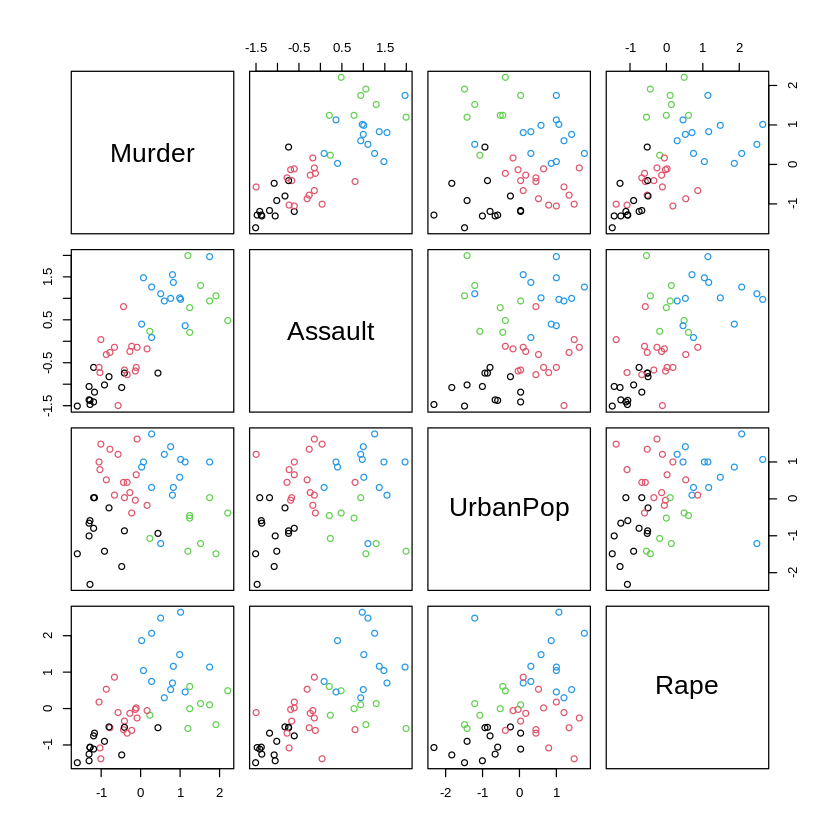

In [11]:
# Plotando o gráfico com os gupos formados
with(USArrests, pairs(dados, col=c(1:4) [model$cluster]))